##SHARMILA GOWRI VELUGULA: [ku3936]

# **Q2 - JENA Flowers Dataset: CNN classification using Tansfer Learning**

Required:
* JF30-1 Zip folder should be uploaded to the google drive
* Drive is mounted at '/content/drive'


* Classifying 30 different classes of flowers present in Jena Flowers Dataset using Transfer Learning method in Convolutional Neural Network.
* Imported class labels and images from drive. Preprocessed the data and partitioned into Training data and Validation data.
* Created Training and Validation folders for all the classes in the dataset.
* Created paths to access the images from the respective folders.
* Trained a model using Transfer Learning method VGG16 for classification of 30 different classes. Used data augmentation with image generator to the training images and built a predictive model which will predict class of the flower.


#Libraries

In [ ]:
#Import Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil as cf
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD
print(tf.__version__)


2.3.0


In [ ]:
#Mounted drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Loading

In [ ]:
# Import and Unzip the JF30-1.zip folder
!cp "/content/drive/My Drive/JF30-1.zip" "JF30-1.zip"
import zipfile
zip_ref = zipfile.ZipFile('JF30-1.zip', 'r')
zip_ref.extractall('JF30-1') # unzip directory
zip_ref.close()

In [ ]:
#Unzip the folder
!unzip JF30-1.zip -d ./

Archive:  JF30-1.zip
  inflating: ./JF30-1/tst3.txt       
   creating: ./__MACOSX/
   creating: ./__MACOSX/JF30-1/
  inflating: ./__MACOSX/JF30-1/._tst3.txt  
  inflating: ./JF30-1/tst2.txt       
  inflating: ./__MACOSX/JF30-1/._tst2.txt  
  inflating: ./JF30-1/tst1.txt       
  inflating: ./__MACOSX/JF30-1/._tst1.txt  
   creating: ./JF30-1/jpg/
  inflating: ./JF30-1/jpg/JFT_01092.jpg  
   creating: ./__MACOSX/JF30-1/jpg/
  inflating: ./__MACOSX/JF30-1/jpg/._JFT_01092.jpg  
  inflating: ./JF30-1/jpg/JFT_01086.jpg  
  inflating: ./__MACOSX/JF30-1/jpg/._JFT_01086.jpg  
  inflating: ./JF30-1/jpg/JFT_00398.jpg  
  inflating: ./__MACOSX/JF30-1/jpg/._JFT_00398.jpg  
  inflating: ./JF30-1/jpg/JFT_00429.jpg  
  inflating: ./__MACOSX/JF30-1/jpg/._JFT_00429.jpg  
  inflating: ./JF30-1/jpg/JFT_01051.jpg  
  inflating: ./__MACOSX/JF30-1/jpg/._JFT_01051.jpg  
  inflating: ./JF30-1/jpg/JFT_01045.jpg  
  inflating: ./__MACOSX/JF30-1/jpg/._JFT_01045.jpg  
  inflating: ./JF30-1/jpg/JFT_00415.jpg  
 

#Data Pre-processing

Import images and class labels:

split the images into train_images and Val_images:

In [ ]:
#import Class labels
image_flowers = pd.read_csv('/content/JF30-1/classlabels.txt', sep=",", header=None)
image_flowers.columns = ["Image", "Class"]
image_flowers = image_flowers.sort_values('Image')
image_flowers = image_flowers.reindex(np.random.permutation(image_flowers.index))

#Split the images to train_images, val_images
split = int(0.7 * len(image_flowers))
train_names = image_flowers.iloc[:split]
val_names = image_flowers.iloc[split:]

train_images = train_names['Image'].tolist()
val_images = val_names['Image'].tolist()

Create Training and Validation folders:

To import all the classified images to the corresponding class folders under training and validation folders

In [ ]:
#Create class folders under Training and Validation folders
file_init = 'JF30-1'
JPEG_keyword = 'jpg'
class_label_ext = 'classification labels.txt' 
train_keyword = 'Training'
validation_keyword = 'Validation'
keywords = [train_keyword,validation_keyword]

label_file_handle = open('/content/JF30-1/classlabels.txt', 'r')
labels_raw_image = label_file_handle.read()
labels_raw = labels_raw_image.split('\n')
label_dir =[]
if('' in labels_raw):labels_raw.remove('')
for keyword in keywords:
    img_type = []
    if keyword == train_keyword: img_type.append(train_images)
    elif keyword == validation_keyword: img_type.append(val_images)
    for a in img_type[0]:
        if(not os.path.exists(keyword)):
            os.mkdir(keyword)
        for label_format in labels_raw:
            label_dir = label_format.split(',')[1]
            file_name = label_format.split(',')[0]
            label_dir_path = keyword+'/'+str(label_dir)
            if(not os.path.exists(label_dir_path)):
                os.mkdir(label_dir_path)
            file_name = file_name.strip()
            a = a.strip()
            if file_name.lower() == a.lower():
              file_path = file_init+'/'+JPEG_keyword+'/'+a
              cf.copy(file_path, label_dir_path)


6     70
28    68
23    67
13    66
4     66
2     65
7     64
18    63
29    63
20    61
27    61
24    60
10    60
25    56
19    55
14    54
5     54
22    49
12    48
9     46
17    45
3     41
21    38
11    36
26    35
8     28
16    24
15    13
30    12
1     11
Name: Class, dtype: int64



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


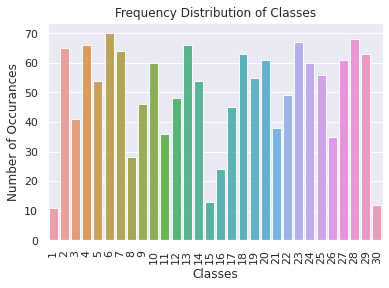

In [14]:
#Class frequency count
Class_Frequency_Count = image_flowers['Class'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(Class_Frequency_Count.index,Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()


we see that class 6 has the highest number of occurances which is 70 

#Transfer Learning - VGG16

* By default, it loads weights pre-trained on ImageNet. Check 'weights' for other options.
* This model can be built both with 'channels_first' data format (channels, height, width) or 'channels_last' data format (height, width, channels).
* The default input size for this model is 224x224.

###VGG16 Conv Layer

In [15]:
from keras.applications import VGG16
vgg_conv = VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

In [16]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f1a52b78978> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f19dcb3dd30> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f19dcb3d860> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f19dcb20898> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1a401201d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f19dcb30358> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f19dcb44e48> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f19dcb4d748> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f19dcb515c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f19dcb519e8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f19dcb545c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

###Data Augmentation

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

#Build the Model

In [18]:
# Create the model
model = keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new custom layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(30, activation= tf.nn.softmax))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 30)               

In [19]:
# check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.functional.Functional object at 0x7f19dcaffb70> True
<tensorflow.python.keras.layers.core.Flatten object at 0x7f1a4021aa20> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f1a4021aa58> True
<tensorflow.python.keras.layers.core.Dropout object at 0x7f19dcac0780> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f19dcab8588> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f19dcad2710> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f19dcad2e10> True


###Using Image generator for Train Images and Class Labels
Configures random transformations and normalization operations to be done on your image data during training

In [25]:
#Preprocessing
train_dir = 'Training'
validation_dir = 'Validation'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 40
val_batchsize = 40
 
train_generator = train_datagen.flow_from_directory( #input dataset
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
train_generator.class_indices

Found 1035 images belonging to 30 classes.


{' 1': 0,
 ' 10': 1,
 ' 11': 2,
 ' 12': 3,
 ' 13': 4,
 ' 14': 5,
 ' 15': 6,
 ' 16': 7,
 ' 17': 8,
 ' 18': 9,
 ' 19': 10,
 ' 2': 11,
 ' 20': 12,
 ' 21': 13,
 ' 22': 14,
 ' 23': 15,
 ' 24': 16,
 ' 25': 17,
 ' 26': 18,
 ' 27': 19,
 ' 28': 20,
 ' 29': 21,
 ' 3': 22,
 ' 30': 23,
 ' 4': 24,
 ' 5': 25,
 ' 6': 26,
 ' 7': 27,
 ' 8': 28,
 ' 9': 29}

In [26]:
validation_generator = validation_datagen.flow_from_directory( #input dataset
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
validation_generator.class_indices

Found 444 images belonging to 30 classes.


{' 1': 0,
 ' 10': 1,
 ' 11': 2,
 ' 12': 3,
 ' 13': 4,
 ' 14': 5,
 ' 15': 6,
 ' 16': 7,
 ' 17': 8,
 ' 18': 9,
 ' 19': 10,
 ' 2': 11,
 ' 20': 12,
 ' 21': 13,
 ' 22': 14,
 ' 23': 15,
 ' 24': 16,
 ' 25': 17,
 ' 26': 18,
 ' 27': 19,
 ' 28': 20,
 ' 29': 21,
 ' 3': 22,
 ' 30': 23,
 ' 4': 24,
 ' 5': 25,
 ' 6': 26,
 ' 7': 27,
 ' 8': 28,
 ' 9': 29}

###Compile and Fit the Model on to Validation Data

In [27]:
#Compile and Fit Model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history_r = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
26/25 [==============================] - 34s 1s/step - loss: 2.8624 - acc: 0.2155 - val_loss: 1.8303 - val_acc: 0.5045
Epoch 2/20
26/25 [==============================] - 32s 1s/step - loss: 1.7234 - acc: 0.4773 - val_loss: 1.0124 - val_acc: 0.6914
Epoch 3/20
26/25 [==============================] - 33s 1s/step - loss: 1.1528 - acc: 0.6377 - val_loss: 0.7034 - val_acc: 0.7455
Epoch 4/20
26/25 [==============================] - 33s 1s/step - loss: 0.8083 - acc: 0.7401 - val_loss: 0.3943 - val_acc: 0.8649
Epoch 5/20
26/25 [==============================] - 33s 1s/step - loss: 0.6593 - acc: 0.7894 - val_loss: 0.3592 - val_acc: 0.8851
Epoch 6/20
26/25 [==============================] - 33s 1s/step - loss: 0.4886 - acc: 0.8425 - val_loss: 0.3651 - val_acc: 0.8986
Epoch 7/20
26/25 [==============================] - 33s 1s/step - loss: 0.3339 - acc: 0.8918 - val_loss: 0.1901 - val_acc: 0.9437
Epoch 8/20
26/

#Plot the graph : Accuracy and Loss

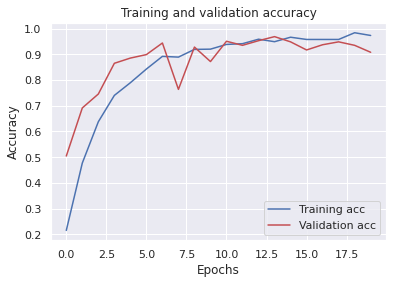

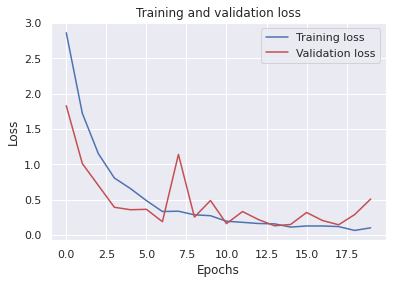

In [33]:
# Plot

acc = history_r.history['acc']
val_acc = history_r.history['val_acc']
loss = history_r.history['loss']
val_loss = history_r.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
# Max Accuracy

print("Validation Accuracy:", max(history_r.history['val_acc']))
print("Training Accuracy", max(history_r.history['acc']))

Validation Accuracy: 0.9684684872627258
Training Accuracy 0.9835748672485352


#Predictions

In [36]:
#8. Predicions and Evaluate
pred = model.predict_generator(validation_generator)

In [37]:
predictions  = []
for each in range(len(pred)):
  predictions.append(np.argmax(pred[each]))
len(predictions)

444

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(validation_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.76      1.00      0.86        19
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.95      1.00      0.97        18
           5       0.46      1.00      0.63        18
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00         9
          13       0.78      1.00      0.88        14
          14       1.00      1.00      1.00        13
          15       0.94      0.94      0.94        18
          16       0.86      1.00      0.92        18
          17       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#CONCLUSION

CNN Model is created using 
  * Used VGG convolutional layer freezing all layers leaving last 4 layers with shape (224,224,3).
  * On top of the VGG conv layer,added four more dense layers with relu as activation funstion. Activation function used in hidden layers is RELU. As it is the multiclass classification which has 30 different classes, used softmax in the output layer with 30 neurons.
  
Accuary obtained in the model for the validation data is 96.8%,recall is 91 %.
  * Initially the validation loss was high but then it has reduced and smoothened.
 
The model trained using transfer learning(VGG16) where the accuracy is 96.8% is performing better than the model using Convolutional neural network where the accuarcy was 87.5 %